In [1]:
#import the libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
ls


 Volume in drive C has no label.
 Volume Serial Number is 9046-6470

 Directory of C:\Users\ojie\Documents\Machine Learning Project\churn-prediction

28/05/2024  11:26    <DIR>          .
27/05/2024  18:06    <DIR>          ..
28/05/2024  09:20    <DIR>          .ipynb_checkpoints
28/05/2024  10:19               200 README.md
28/05/2024  11:26            23,617 Untitled.ipynb
28/05/2024  10:15           977,501 WA_Fn-UseC_-Telco-Customer-Churn.csv
               3 File(s)      1,001,318 bytes
               3 Dir(s)  305,904,492,544 bytes free


In [3]:
#read the dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(len(df))

7043


There are 7043 rows in this dataset.

In [4]:
#checking the first 5 samples
df.head().T

0             1               2  \
customerID              7590-VHVEG    5575-GNVDE      3668-QPYBK   
gender                      Female          Male            Male   
SeniorCitizen                    0             0               0   
Partner                        Yes            No              No   
Dependents                      No            No              No   
tenure                           1            34               2   
PhoneService                    No           Yes             Yes   
MultipleLines     No phone service            No              No   
InternetService                DSL           DSL             DSL   
OnlineSecurity                  No           Yes             Yes   
OnlineBackup                   Yes            No             Yes   
DeviceProtection                No           Yes              No   
TechSupport                     No            No              No   
StreamingTV                     No            No              No   
StreamingMovies                 No            No              No   
Contract            Month-to-month      One year  Month-to-month   
PaperlessBilling               Yes            No             Yes   
PaymentMethod     Electronic check  Mailed check    Mailed check   
MonthlyCharges               29.85         56.95           53.85   
TotalCharges                 29.85        1889.5          108.15   
Churn                           No            No             Yes   

                                          3                 4  
customerID                       7795-CFOCW        9237-HQITU  
gender                                 Male            Female  
SeniorCitizen                             0                 0  
Partner                                  No                No  
Dependents                               No                No  
tenure                                   45                 2  
PhoneService                             No               Yes  
MultipleLines              No phone service                No  
InternetService                         DSL       Fiber optic  
OnlineSecurity                          Yes                No  
OnlineBackup                             No                No  
DeviceProtection                        Yes                No  
TechSupport                             Yes                No  
StreamingTV                              No                No  
StreamingMovies                          No                No  
Contract                           One year    Month-to-month  
PaperlessBilling                         No               Yes  
PaymentMethod     Bank transfer (automatic)  Electronic check  
MonthlyCharges                         42.3              70.7  
TotalCharges                        1840.75            151.65  
Churn                                    No               Yes

In [5]:
print(f"There are {len(df.columns)} features in this dataset.")

There are 21 features in this dataset.


In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<h1> Explaination of the features </h1>
<ol> 
<li>CustomerID: The idenification of the customer</li>
<li>gender: male/female</li>
<li>SeniorCitizen: whether the customer is a senior citizen or not (0/1)</li>
<li>Partner: whether they live with a partner (yes/no)</li>
<li>Dependents: whether they have dependents (yes/no)</li>
<li>tenure: number of months since the start of the contract</li>
<li>PhoneService: whether they have phone services (yes/no)</li>
<li>MultipleLines: whether they have multiple phone lines (yes/no/no/no phone service)</li>
<li>InternetService: the type of internet service (no/fiber/optic)</li>
<li>OnlineSecurity: if online security is enabled (yes/no/no internet)</li>
<li>OnlineBackup: if online backup service is enabled (yes/no/no internet)</li>
<li>DeviceProtection: if the device protection service is enabled (yes/no/no internet)</li>
<li>TechSupport: if the customer has tech support (yes/no/no internet)</li>
<li>StreamingTV: if the TV streaming service is enabled (yes/no/no internet) </li>
<li>StreamingMovies: if the movie streaming service is enabled (yes/no/no internet)</li>
<li>Contract: the type of contract (monthly/yearly/two years)</li>
<li>PaperlessBilling: if the billing is paperless (yes/no)</li>
<li>PaymentMethod: payment method (electronic check, mailed check, bank transfer,
credit card)</li>
<li>MonthlyCharges: the amount charged monthly (numeric)</li>
<li>TotalCharges: the total amount charged (numeric)</li>
<li>Churn: if the client has canceled the contract (yes/no)</li>

</ol>
<h2> Churn is the target varible. The variable we want to predict. </h2>

In [7]:
# checking the datatypes
display(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

<h1> Issues </h1>
<p>Notice that TotalCharges is an object. This should be numerical as it contains the ammount of money spent. The problem here is that in some cases, this column contains a space to represent missing values. This will go undetected when null values are checked. <b>Since we know that this value should be numeric, we need to convert it to numeric using the to_numeric function of pandas </b> </p>

In [8]:
# checking for missing values 
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
# conveting TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')

In [10]:
# checking for missing values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

As we can see there are 11 missing values in TotalCharges. We can also see the rows with missing values. The <b>isnull</b> function returns true for values that are null. When this values are passed to the dataframe, it returns missing rows.

In [11]:
df[df['TotalCharges'].isnull()][['customerID','TotalCharges']]

customerID  TotalCharges
488   4472-LVYGI           NaN
753   3115-CZMZD           NaN
936   5709-LVOEQ           NaN
1082  4367-NUYAO           NaN
1340  1371-DWPAZ           NaN
3331  7644-OMVMY           NaN
3826  3213-VVOLG           NaN
4380  2520-SGTTA           NaN
5218  2923-ARZLG           NaN
6670  4075-WKNIU           NaN
6754  2775-SEFEE           NaN

In [12]:
# Fill missing values with zero
df.TotalCharges = df.TotalCharges.fillna(0)

In [13]:
# Converting all the column names to missing values and lowercase letters
df.columns = df.columns.str.lower().str.replace(' ','_')

for col in df.columns[df.dtypes=='object']:
    df[col] = df[col].str.lower().str.replace(' ','_')

In [15]:
# Coverting the target variable to binary
display(df['churn'])
df['churn'] = (df.churn == 'yes').astype(int)

0        no
1        no
2       yes
3        no
4       yes
       ... 
7038     no
7039     no
7040     no
7041    yes
7042     no
Name: churn, Length: 7043, dtype: object

Machine learning models only accepts numbers. df.churn=='yes' returns a boolean which can either be true or false. The astype(int) converts this values to 1 or zero.

In [16]:
#splitting the dataset into training, testing and validation
from sklearn.model_selection import train_test_split

df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=2)
df_train, df_val = train_test_split(df_train_full, test_size= 0.33, random_state=2)

In [17]:
# obtaining the target variable
y_train = df_train.churn.values
y_test = df_test.churn.values
y_val = df_val.churn.values

# deleting the y_train, y_test, y_val from the dataset 
del df_train['churn']
del df_test['churn']
del df_val['churn']

<h1>Exploratory data analysis</h1>

A step we have to do before training the model. It means looking at the data.

In [18]:
# checking for missing values on the training data
df_train_full.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

churn
0    4113
1    1521
Name: count, dtype: int64

<Axes: xlabel='churn'>

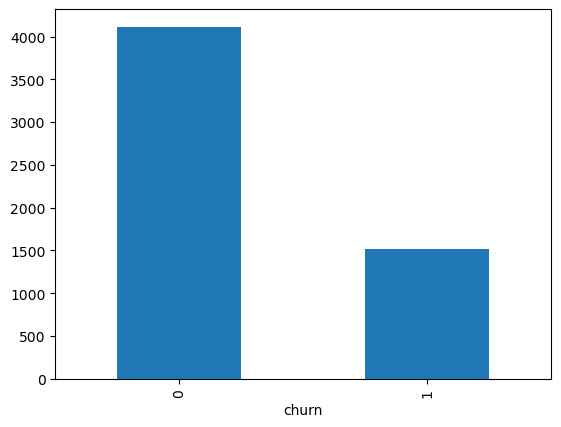

In [20]:
# checking the target distribution
display(df_train_full['churn'].value_counts())
df_train_full['churn'].value_counts().plot(kind='bar')

We can see that the people who churn are lower than those who don't. This is an imbalanced dataset. 1521/(1521+4113)= 27% of the customers churn. Which is relatively high.

<h1> Feature Importance </h1> 
<p> We will use mutual information score and correlation for feature importance. </p>

In [22]:
df_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges'],
      dtype='object')

In [24]:
# Extracting the categorical and numerical cols

categorical_cols = ['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies','contract', 'paperlessbilling',
       'paymentmethod']

numerical_cols = ['monthlycharges', 'totalcharges', 'tenure']

In [25]:
# Checking how many numerical cols are available
df_train_full[categorical_cols].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

The apply() function is used to apply a function to a dataframe and each column is treated as an individual entity. It is essentially used to replace the process of a for loop.

In [36]:
from sklearn.metrics import mutual_info_score

def cal_mi(col):
    """This function calculate the mutual information score for each col"""
    return mutual_info_score(col, df_train_full.churn)

df_mi = df_train_full[categorical_cols].apply(cal_mi).to_frame(name='MI').sort_values(by='MI',ascending=False)
df_mi

MI
contract          0.103062
techsupport       0.066327
onlinesecurity    0.063908
internetservice   0.056059
onlinebackup      0.048986
paymentmethod     0.044974
deviceprotection  0.044955
streamingmovies   0.032616
streamingtv       0.032598
paperlessbilling  0.020034
dependents        0.014230
partner           0.010758
seniorcitizen     0.010381
multiplelines     0.000530
phoneservice      0.000113
gender            0.000059

Contract, techsupport, onlinesecurity internet service, and onlinebackup are among the top five variables.

In [40]:
# correlation with the target
df_train_full[numerical_cols].corrwith(df_train_full.churn).to_frame(name='correlation')

correlation
monthlycharges     0.193837
totalcharges      -0.204527
tenure            -0.358017

The higher the monthly charges the more likely for the customer to churn. While the higher the totalcharges and the tenure the less likely for the customer to churn.

<h1> Feature Engineering </h1>

One hot encoding: firstly we need to convert our dataframe to list of dictionaries using to_dict(orient='records') method. 

In [42]:
# Convert to list of dictionaries
train_dict = df_train[numerical_cols+categorical_cols].to_dict(orient='records')
#train_dict

In [48]:
# We use the DictVectorizer to fit and transorm the dictionary to matrix
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
X_train = dv.transform(train_dict)
X_train[1]

array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
       0.000e+00, 8.630e+01, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
       0.000e+00, 3.900e+01, 3.266e+03])

The categorical variables have take the values of ones and zeros while the numerical ones are still the same.

In [49]:
# These are the feature names
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

<h1> Classification </h1>

In [51]:
# Training the model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [52]:
# Transforming the categorical variables
val_dict = df_val[numerical_cols+categorical_cols].to_dict(orient='records')
X_val = dv.transform(val_dict)
X_val

array([[1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.00000e+00, 4.93000e+01],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        7.20000e+01, 7.75170e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        5.00000e+00, 8.60500e+01],
       ...,
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        4.80000e+01, 1.00450e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 5.07500e+01],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        7.10000e+01, 6.45715e+03]])

In [60]:
# Using the model for prediction
y_pred = lr.predict_proba(X_val)
display(y_pred)
y_pred = y_pred[:,1]
churn = (y_pred >= 0.5).astype(int)

array([[0.60096698, 0.39903302],
       [0.85896606, 0.14103394],
       [0.73944319, 0.26055681],
       ...,
       [0.98441266, 0.01558734],
       [0.52541386, 0.47458614],
       [0.98982181, 0.01017819]])

The first column is 0 (no churn) and the second is churn. Our aim is to select the one with churn. 


In [62]:
# This shows that the model is 81% accurate
(y_val == churn).astype(int).mean()*100

81.39784946236558

In [68]:
# printing the coefficients
display(lr.coef_[0].round(3))
#printing the bias
display(lr.intercept_[0])

array([ 4.51121238e-01, -1.66220050e-01, -4.14989715e-01,  1.64963238e-02,
       -1.46584851e-01,  3.29834750e-02, -8.94924597e-02, -7.35795425e-02,
       -2.42277005e-02, -1.05860827e-01, -3.50751169e-01,  3.10155102e-01,
       -8.94924597e-02,  3.32836985e-03, -1.79353659e-01,  7.17831564e-02,
       -2.25180251e-02,  1.16664920e-01, -8.94924597e-02, -1.57260987e-01,
        1.31841827e-01, -8.94924597e-02, -1.72437894e-01, -2.89099256e-01,
        1.59010729e-01, -1.22638519e-01, -7.45000836e-03,  6.81943958e-02,
       -2.91652331e-01,  1.96741807e-01, -1.03372399e-01,  7.17831564e-02,
       -2.01871684e-01,  1.51011331e-01, -1.37232208e-01, -8.94924597e-02,
        9.66361410e-02, -9.64124014e-02, -8.94924597e-02,  5.58163338e-02,
        2.67938032e-01, -8.94924597e-02, -3.08534099e-01, -5.70203535e-02,
        2.62311825e-04])

-0.1317018164394732

zip is used to combine two arrays together.

In [72]:
# features and their weights
dict(zip(dv.get_feature_names_out(), lr.coef_[0].round(3)))

{'contract=month-to-month': 0.451,
 'contract=one_year': -0.166,
 'contract=two_year': -0.415,
 'dependents=no': 0.016,
 'dependents=yes': -0.147,
 'deviceprotection=no': 0.033,
 'deviceprotection=no_internet_service': -0.089,
 'deviceprotection=yes': -0.074,
 'gender=female': -0.024,
 'gender=male': -0.106,
 'internetservice=dsl': -0.351,
 'internetservice=fiber_optic': 0.31,
 'internetservice=no': -0.089,
 'monthlycharges': 0.003,
 'multiplelines=no': -0.179,
 'multiplelines=no_phone_service': 0.072,
 'multiplelines=yes': -0.023,
 'onlinebackup=no': 0.117,
 'onlinebackup=no_internet_service': -0.089,
 'onlinebackup=yes': -0.157,
 'onlinesecurity=no': 0.132,
 'onlinesecurity=no_internet_service': -0.089,
 'onlinesecurity=yes': -0.172,
 'paperlessbilling=no': -0.289,
 'paperlessbilling=yes': 0.159,
 'partner=no': -0.123,
 'partner=yes': -0.007,
 'paymentmethod=bank_transfer_(automatic)': 0.068,
 'paymentmethod=credit_card_(automatic)': -0.292,
 'paymentmethod=electronic_check': 0.197,


In [73]:
import math

def sigmoid(score):
    return 1/(1+ math.exp(-score))
sigmoid(lr.intercept_[0])

0.46712205549575764

This means that on average the probabilty of churning is 46.7%, meaning that customers are more likely to stay. if the weight is positive the respective feature is an indicator of churn. The magnitude indicates the strength of the indication. 

In [91]:
# Evaluating the model on a customer
customer = df_test.iloc[1].to_dict() # converting to dictionary
X_test = dv.transform([customer]) # transforming the features to look like the training and validdation features
pred = lr.predict_proba(X_test)[0,1]# apply the features for prediction

(pred>0.5).astype(int) # result of the prediction

0

This means that the customer is not likely to churn

In [93]:
y_test[1]

0